In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as trans
import matplotlib.pyplot as plt
import numpy as np
import ssl
from torchview import draw_graph

In [3]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.flatten = nn.Flatten()
    self.relu = nn.PReLU()
    
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=(1,1), padding=(1,1)),
        nn.BatchNorm2d(16),
        nn.PReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=(1,1), padding=(1,1)),
        nn.BatchNorm2d(32),
        nn.PReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer3 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=(1,1), padding=(1,1)),
        nn.BatchNorm2d(64),
        nn.PReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer4 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=(1,1), padding=(1,1)),
        nn.BatchNorm2d(128),
        nn.PReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer5 = nn.Sequential(
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=(1,1), padding=(1,1)),
        nn.BatchNorm2d(256),
        nn.PReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer6 = nn.Sequential(
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=(1,1), padding=(1,1)),
        nn.BatchNorm2d(256),
        nn.PReLU(),
        nn.MaxPool2d(2, 2)
    )
    
    # self.fc1 = nn.Linear(256 * 3 * 3, 1024)
    self.fc1 = nn.Linear(256 * 3 * 3, 102)
    self.drop = nn.Dropout(p=0.5)
    self.fc2 = nn.Linear(1024, 256)
    self.fc3 = nn.Linear(256, 102)  # Output layer for 102 classes

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    x = self.layer4(x)
    x = self.layer5(x)
    x = self.layer6(x)
    
    x = self.flatten(x)
    x = self.fc1(x)
    # x = self.drop(x)
    # x = self.fc2(x)
    # x = self.drop(x)
    # x = self.fc3(x)
    # x = self.drop(x)
    # x = self.fc2(x)
    # x = self.relu(x)
    # x = self.fc3(x)
    return x


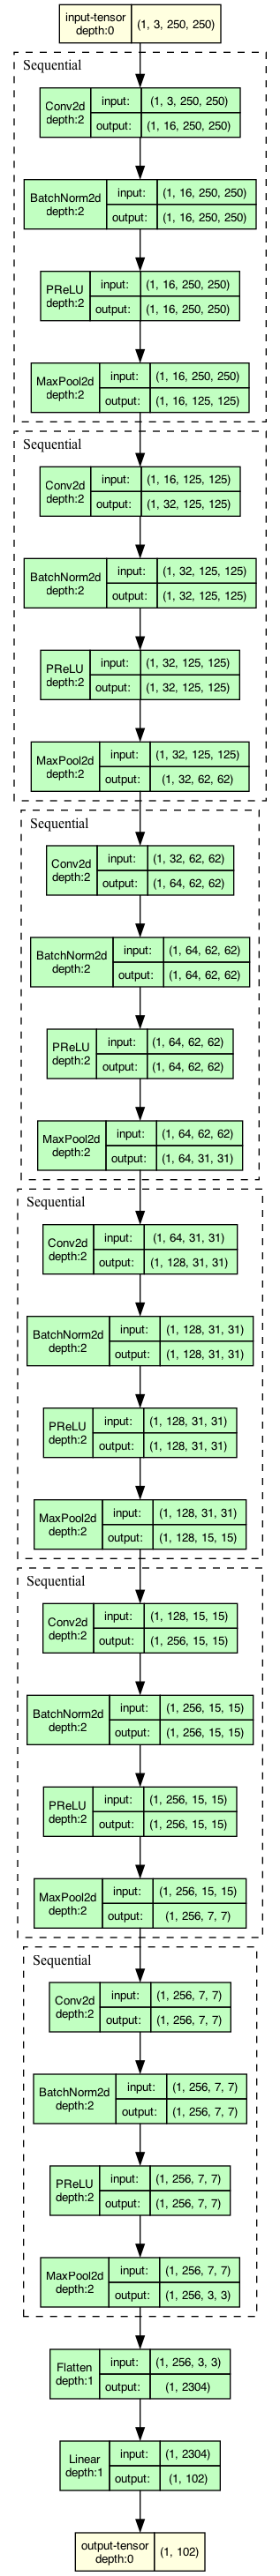

In [4]:
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(CNN(), input_size=(1, 3, 250, 250), expand_nested=True)
model_graph.resize_graph(scale=5.0)
model_graph.visual_graph